In [1]:

from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
from rasterio.enums import Resampling


S_sentinel_bands = glob("/home/jovyan/satData/S2A_MSIL2A_20230309T073731_N0509_R092_T37NCC_20230309T133952.SAFE/GRANULE/L2A_T37NCC_A040272_20230309T075805/IMG_DATA/all/*B?*.jp2")

S_sentinel_bands.sort()

l = []

#upscale_factor = 2
xres = 10.0
yres = 10.0

for i in S_sentinel_bands:
  with rio.open(i, 'r') as dataset:
    scale_factor_x = dataset.res[0]/xres
    scale_factor_y = dataset.res[1]/yres
    
#    profile = dataset.profile.copy()
    # resample data to target shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * scale_factor_y),
            int(dataset.width * scale_factor_x)
        ),
        resampling=Resampling.bilinear
    )

#    # scale image transform
#    
#    transform = dataset.transform * dataset.transform.scale(
#        (1 / scale_factor_x),
#        (1 / scale_factor_y)
#    )
#    profile.update({"height": data.shape[-2],
#                    "width": data.shape[-1],
#                   "transform": transform})

    l.append(data[0])

arr_st = np.stack(l)

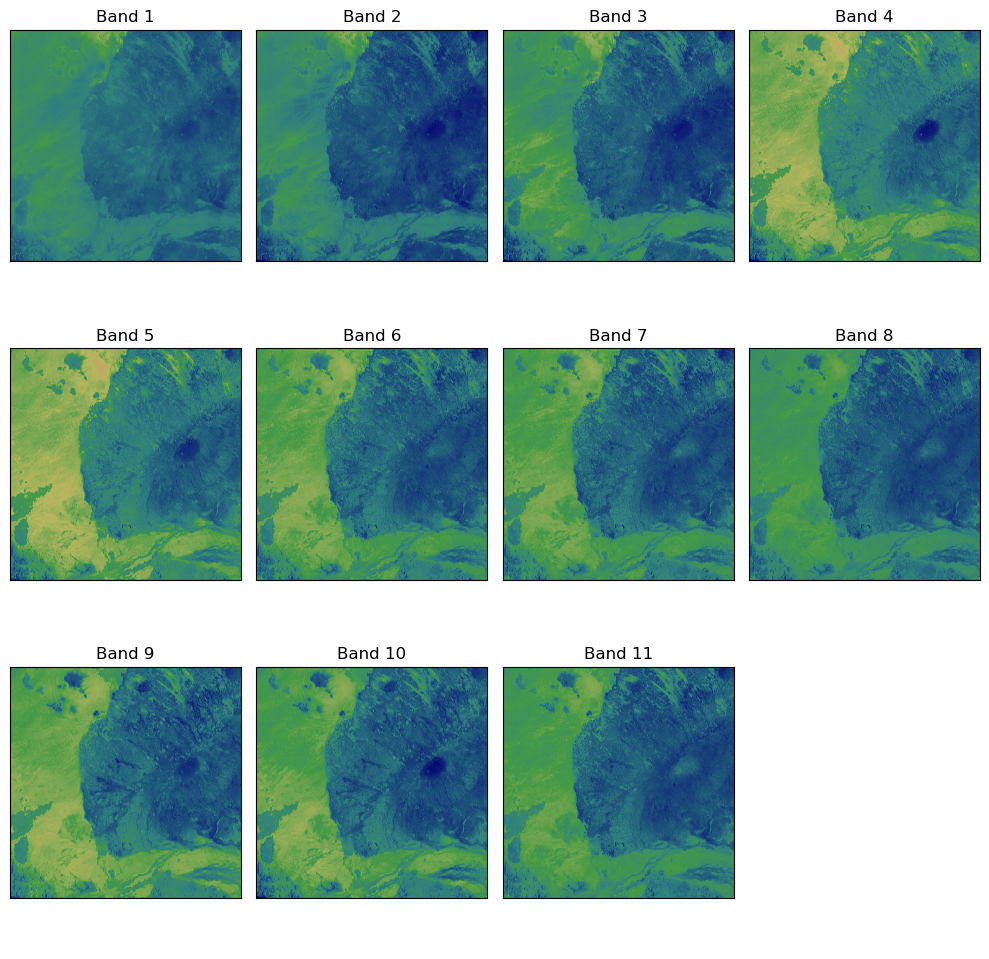

In [3]:
#visualize bands
ep.plot_bands(arr_st, 
              cmap = 'gist_earth', 
              figsize = (10, 10), 
              cols = 4, 
              cbar = False)
plt.show()

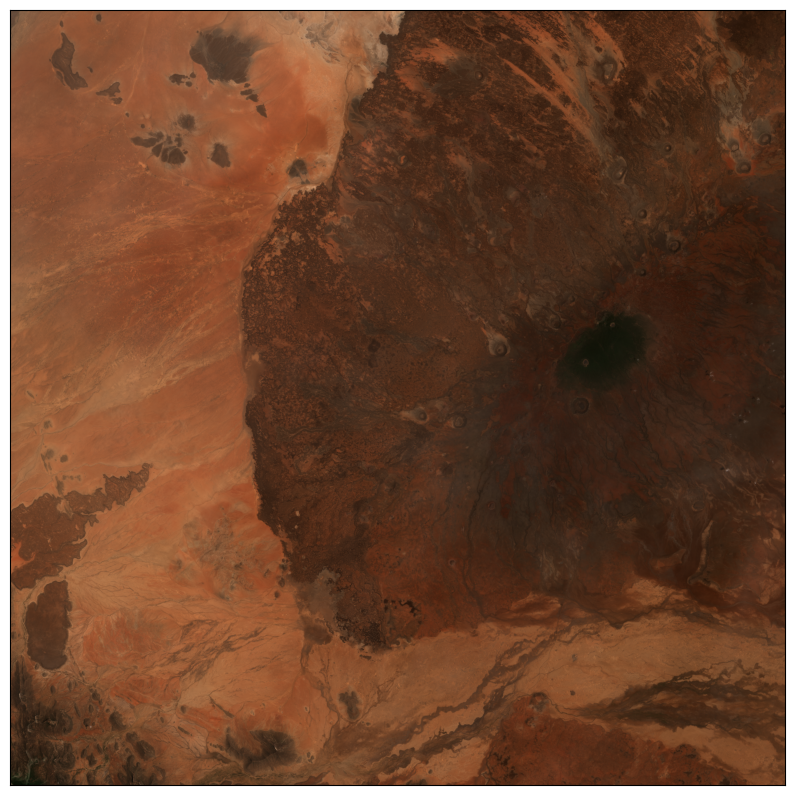

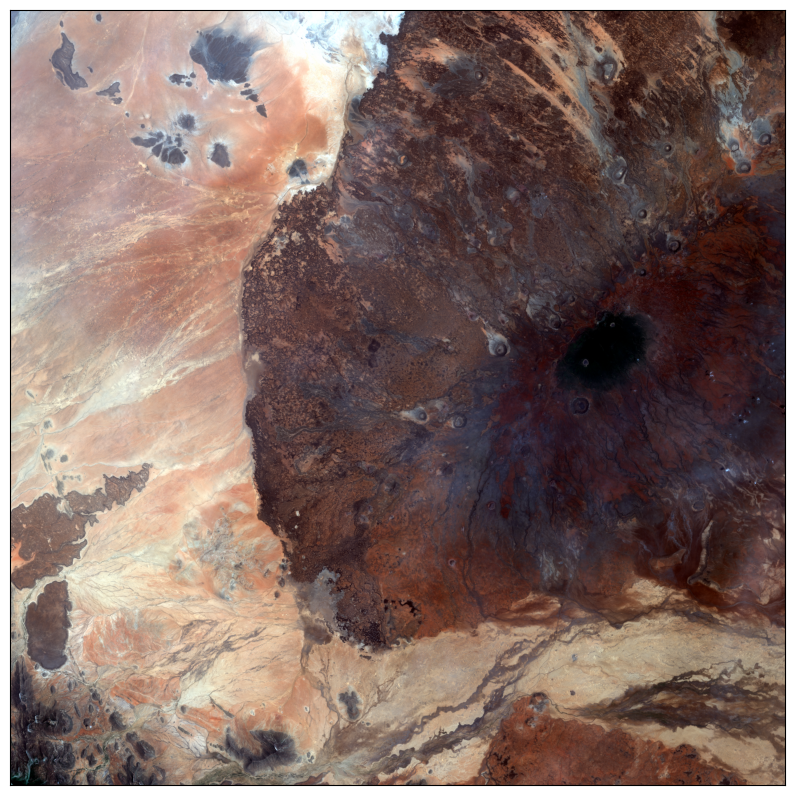

In [4]:
# RGB Composite Image

rgb = ep.plot_rgb(arr_st, 
                  #rgb=(2,1,0), 
                  rgb=(3,2,1), 
                  figsize=(10, 16))
plt.show()

# RGB Composite Image with Stretch

ep.plot_rgb(arr_st,
            #rgb=(2,1,0), 
            rgb=(3,2,1),
            stretch=True,
            str_clip=0.5,
            figsize=(10, 16))
plt.show()

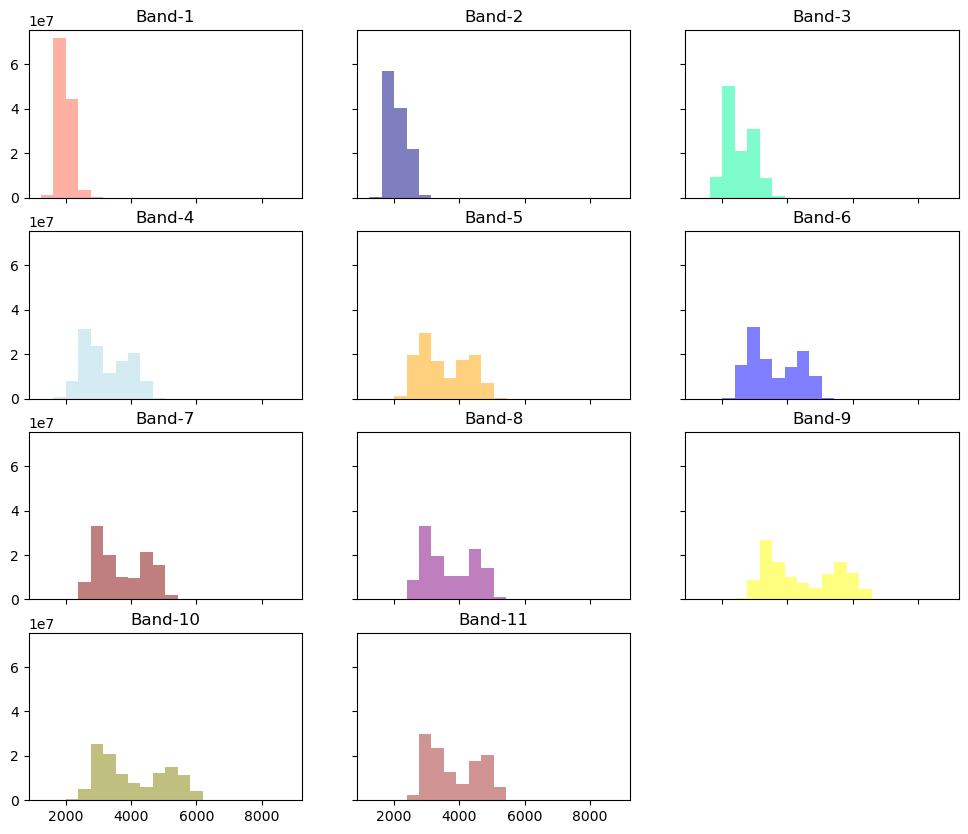

In [5]:
#histogramms
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',#'black',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

#colors = ['blue', 'green', 'red', 'cyan']


ep.hist(arr_st, 
        colors = colors,
        title=[f'Band-{i}' for i in range(1, 12)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10))

plt.show()

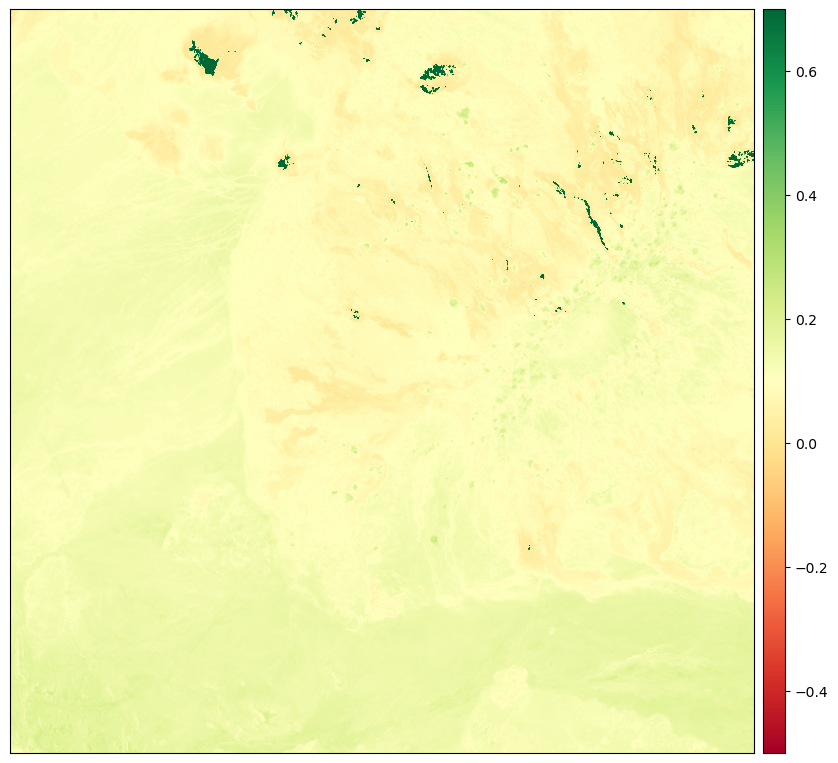

In [23]:
#ndvi


ndvi = es.normalized_diff(arr_st[8], arr_st[4])

ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, vmin=-0.5, vmax=0.7, figsize=(10, 14))

plt.show()

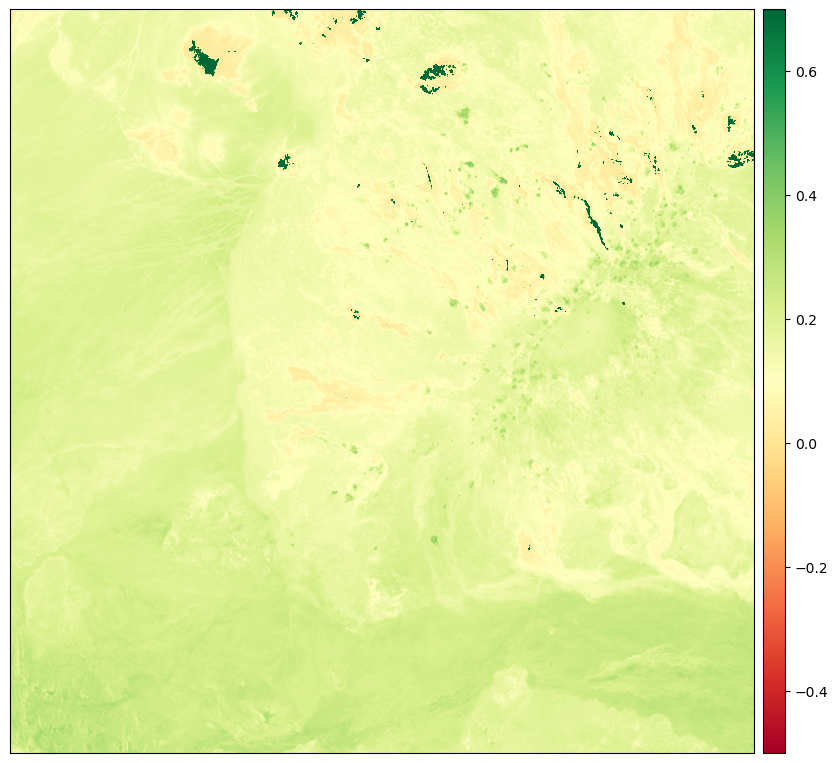

In [24]:
# Soil Adjusted Vegetation Index (SAVI)
# SAVI = ((NIR - Red) / (NIR + Red + L)) x (1 + L)
L = 0.5

savi = ((arr_st[8] - arr_st[4]) / (arr_st[8] + arr_st[4] + L)) * (1 + L)

ep.plot_bands(savi, cmap="RdYlGn", cols=1, vmin=-0.5, vmax=0.7, figsize=(10, 14))

plt.show()

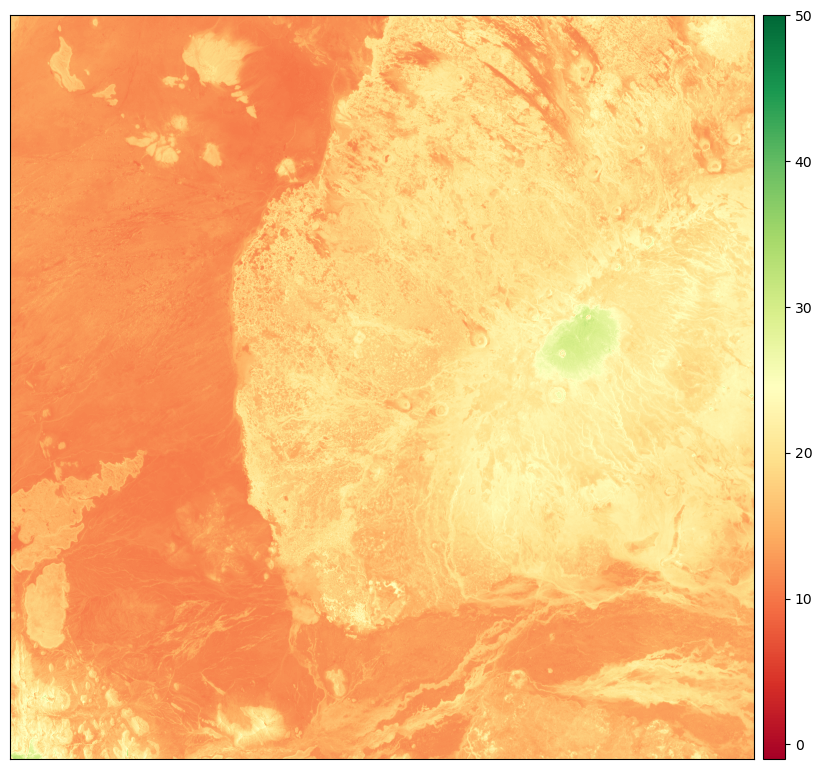

In [8]:
# Visible Atmospherically Resistant Index (VARI)
# VARI = (Green - Red)/ (Green + Red - Blue)
vari = (arr_st[3] - arr_st[4])/ (arr_st[3] + arr_st[4] - arr_st[2])

ep.plot_bands(vari, cmap="RdYlGn", cols=1, vmin=-1, vmax=50, figsize=(10, 14))

plt.show()

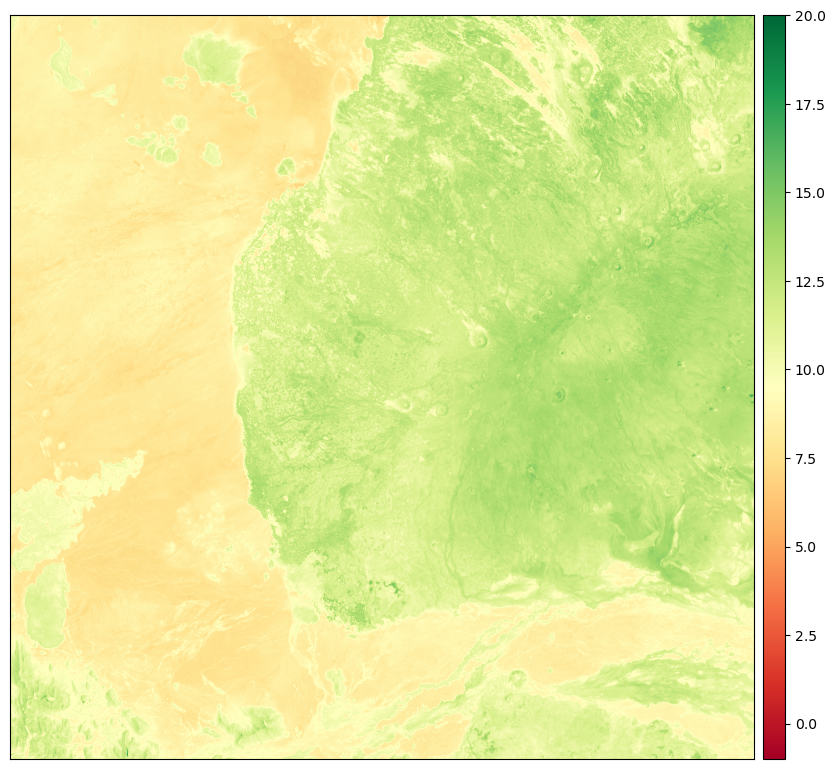

In [9]:
# Modified Normalized Difference Water Index (MNDWI)
# MNDWI = (Green - SWIR) / (Green + SWIR)
mndwi = es.normalized_diff(arr_st[2], arr_st[10])

ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, vmin=-1, vmax=20, figsize=(10, 14))

plt.show()

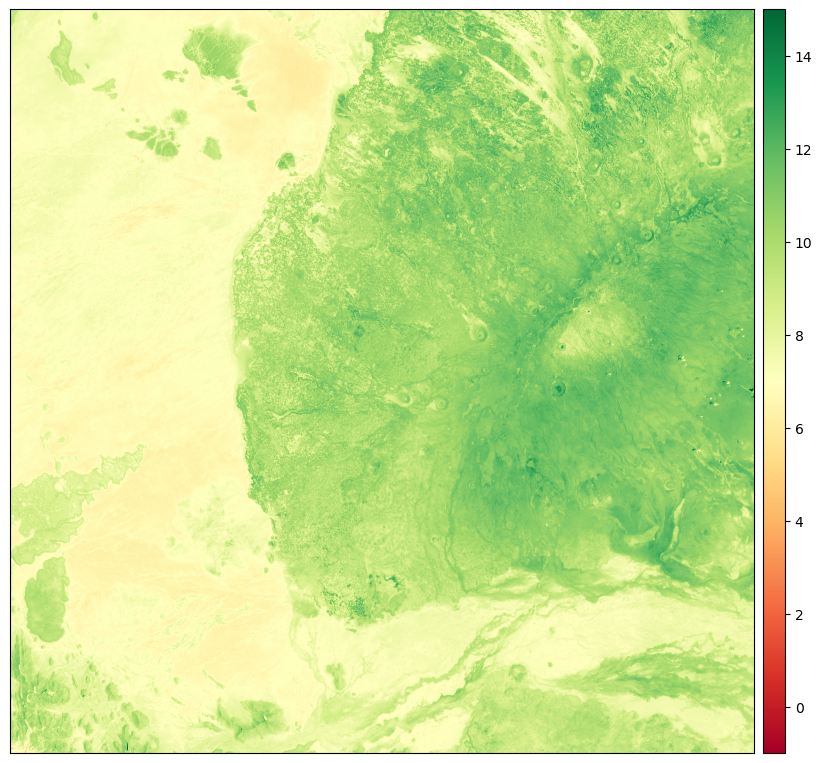

In [10]:
# Normalized Difference Moisture Index (NDMI)
# NDMI = (NIR - SWIR1)/(NIR + SWIR1)
ndmi = es.normalized_diff(arr_st[7], arr_st[10])

ep.plot_bands(ndmi, cmap="RdYlGn", cols=1, vmin=-1, vmax=15, figsize=(10, 14))

plt.show()

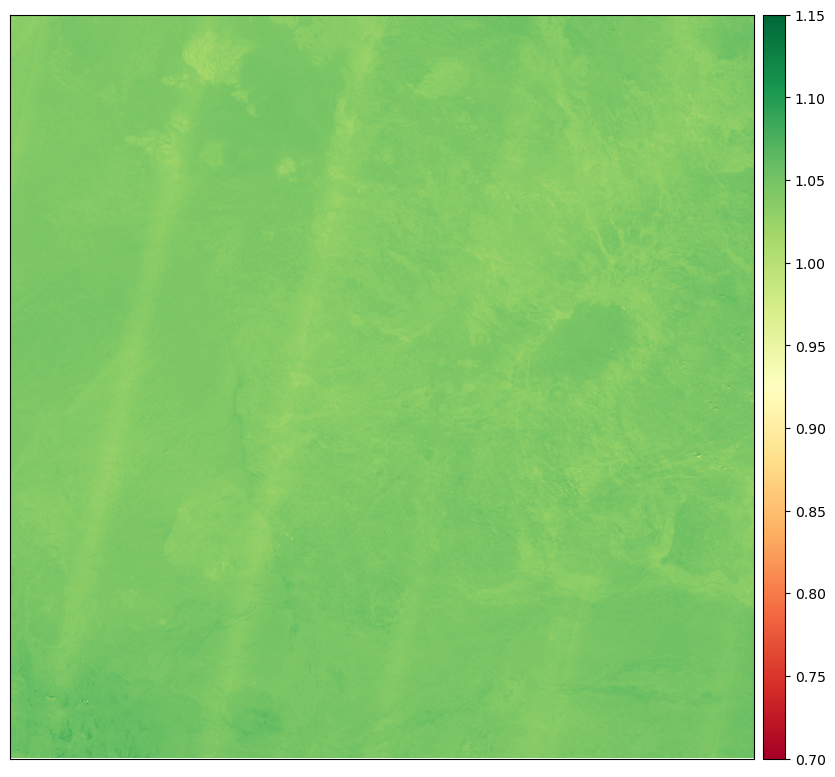

In [21]:
# Ferrous Minerals Ratio = SWIR / NIR
fmr = np.divide(arr_st[10], arr_st[7])

ep.plot_bands(fmr, cmap="RdYlGn", cols=1, vmin=0.7, vmax=1.15, figsize=(10, 14))

plt.show()